# MNIST 손글씨 숫자 예측


### 다음과 같은 ANN 을 만든다

이미지파일(28X28픽셀)이 입력으로 들어오면, 아웃풋으로는 0~9 까지의 10개 숫자로 분류하는 인공지능!

사진은 2차원 데이터이므로, 우리는 ANN의 입력에, 사진의 픽셀값을 flattening 하여 입력을 줄 것이다.

따라서 입력레이어는 784개, 히든1은 512, 히든2는 512, 아웃풋은 10개의 신경망 구축. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
# MNist 데이터를 가져온다. 이미 7만장의 손글씨 이미지 데이터가 있다. 

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 데이터 모양 확인

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

In [ ]:
# 이미지 데이터 1개를 가져와서, 화면에 찍어보자.

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

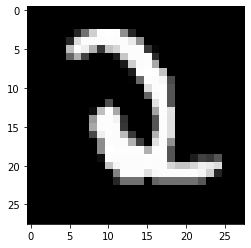

In [18]:
plt.imshow(X_train[400] , cmap='gray')
plt.show()

In [19]:
y_train[400]

2

In [ ]:
# 이미지는 가로, 세로가 있고, 이 안에 숫자 0~255까지 숫자로 채워진 데이터다.

In [ ]:
# 실제 이미지 파일을 표시.

In [ ]:
# 1. 데이터를 딥러닝으로 처리하기 위해서, 행렬로 만들면서, 가로세로 값을 일렬로 만든다.

In [20]:
X_train.shape

(60000, 28, 28)

In [22]:
X_train = X_train.reshape(60000, 28*28)

In [23]:
X_test.shape

(10000, 28, 28)

In [25]:
X_test = X_test.reshape(10000, 28*28)

In [ ]:
# 2. 데이터를 딥러닝에서 처리할 수 있도록 float로 바꿔준다.

In [31]:
X_train = X_train.astype(float)

In [32]:
X_test = X_test.astype(float)

In [ ]:
# 3. 이미지라서, 숫자가 0~255 이므로, 0~1 사이로 정규화 시켜주자.

In [35]:
X_train = X_train / 255.0

In [36]:
X_test = X_test / 255.0

In [ ]:
# 4. 분류의 문제이므로, y값을 확인하여, 카테고리컬 데이터를 원핫인코딩값으로 바꾼다.

In [37]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [38]:
# 넘파이의 레이블 인코딩된 값을, 원핫 인코딩으로 바꾸는 방법!
# 텐서플로우가 제공한다!!!

In [40]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes= 10 )

In [42]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes= 10 )

In [43]:
y_train.shape

(60000, 10)

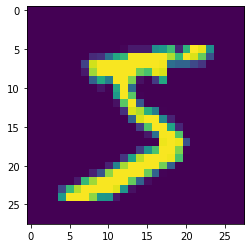

In [46]:
plt.imshow( X_train[0].reshape(28, 28) )
plt.show()

In [47]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# 5. 모델 만들기

In [48]:
def build_model():
  model = Sequential()
  model.add( Dense(512, 'relu', input_shape= (784, )  ) )
  model.add( Dropout(0.4) )
  model.add( Dense(10, 'softmax') )
  model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# 5. 컴파일

In [ ]:
# 6. 학습 

In [49]:
model = build_model()

In [50]:
epoch_history=model.fit(X_train, y_train, epochs=5, validation_data= (X_test,y_test) )

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2479 - accuracy: 0.9268 - val_loss: 0.1175 - val_accuracy: 0.9641
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1194 - accuracy: 0.9632 - val_loss: 0.0919 - val_accuracy: 0.9717
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0912 - accuracy: 0.9722 - val_loss: 0.0676 - val_accuracy: 0.9787
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0758 - accuracy: 0.9758 - val_loss: 0.0715 - val_accuracy: 0.9761
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0626 - accuracy: 0.9798 - val_loss: 0.0667 - val_accuracy: 0.9805


In [ ]:
# 7. 모델 평가.

In [51]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0667 - accuracy: 0.9805


[0.06665651500225067, 0.9804999828338623]

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [56]:
y_pred

array([[3.09610143e-10, 3.82888110e-10, 5.32257651e-08, ...,
        9.99979794e-01, 2.24207053e-09, 6.72179738e-07],
       [4.25139715e-11, 8.18083720e-07, 9.99999106e-01, ...,
        1.50023035e-17, 1.42513279e-10, 2.48644123e-17],
       [5.16288523e-09, 9.99627769e-01, 1.74382130e-05, ...,
        1.36396993e-04, 1.20515804e-04, 1.28663018e-07],
       ...,
       [6.05795863e-14, 1.71458681e-09, 2.15043521e-12, ...,
        6.67713757e-05, 2.71133075e-07, 3.61409911e-05],
       [6.66881134e-11, 1.26513234e-13, 5.57241377e-15, ...,
        3.36039599e-11, 6.13770362e-06, 3.39133951e-12],
       [1.49880961e-08, 8.88604836e-13, 1.94017646e-09, ...,
        1.78389899e-14, 1.85365767e-09, 9.89325158e-13]], dtype=float32)

In [57]:
confusion_matrix(y_test, y_pred)

ValueError: ignored

### 선형대수학 참고 동영상

https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab